# Installing bnlp toolkit and bnltk library

In [1]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 6.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 743 kB 34.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
pip install bnltk

In [3]:
pip install -U bnlp_toolkit

# Importing Library

In [4]:

import gensim
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
! pip install glove-python-binary
from glove import Corpus, Glove

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


     |████████████████████████████████| 948 kB 5.3 MB/s 
punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer

from pandas import read_excel
import re
from re import sub
import multiprocessing

import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D

from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Read dataset

In [6]:
from google.colab import drive
#drive.mount('/content/drive')
dataset=pd.read_csv('/content/Covid vaccine data.csv')


In [7]:
dataset.shape

(418, 2)

Non-urgent: 21900.00%, Urgent: 19900.00%


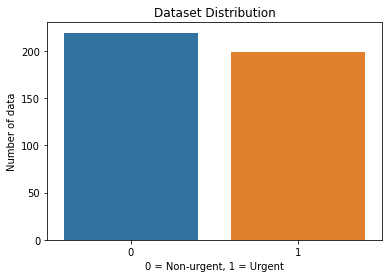

In [8]:
target_vc = dataset["Polarity"].value_counts(normalize=False)
print("Non-urgent: {:.2%}, Urgent: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Dataset Distribution")
plt.xlabel("0 = Non-urgent, 1 = Urgent")
plt.ylabel("Number of data")
plt.show()

# Data Preprocessing

In [9]:
import re
corpus=[]
max=0
for i in range(0,418):
    review = re.sub('[\!"#$%&()*,./:;<=>?@[\\]^`{|}~\t\n।+-]', ' ', dataset['Text'][i])
    review=review.replace('_',' ')
    review=review.replace('ঃ',' ')
    review = re.sub('[a-zA-Z0-9]+', ' ', review)    
    review = re.sub('[''````£|¢|Ñ/=EROero।!“’<>‘॥”‰\'🤓⌚🤰🥺⚽️✌�￰🥀🤣🤡🤗🤐🤦🤔⏩⏹￰]', ' ', review)               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations 
                           u"\\U0001f90f" 
                           u"\\U0001f9cf"
                           u"\U0001fa78"  
                           "]+", flags=re.UNICODE)
    review=emoji_pattern.sub(r'', review)
    #review=str(review)
    #review=review.split()
    '''review=review.replace('A', 'এ')
    review=review.replace('B', 'বি')
    review=review.replace('AB', 'এবি')
    review=review.replace('O', 'ও')
    review=review.replace('+','পজিটিভ')
    review=review.replace('-','নেগেটিভ')'''
    review=review.lower()
    bn_stemmer = BanglaStemmer()
    review=bn_stemmer.stem(review)
    review = remove_stopwords(review, stopwords)
    #review=str(review)
    #review=review.split()
    #review=' '.join(review)
    corpus.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


54


In [ ]:
#corpus

# Feature Selection

In [10]:
# creating a corpus object
corpus2 = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus2.fit(corpus, window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=100, learning_rate=0.01)
 
glove.fit(corpus2.matrix, epochs=100, no_threads=4, verbose=True)
glove.add_dictionary(corpus2.dictionary)

glove_words=list(corpus2.dictionary)


Performing 100 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [11]:
new_dict=dict()
for i in glove_words:
  x=glove.word_vectors[glove.dictionary[i]]
  average = sum(x) / len(x)
  new_dict[i]=average
rows, cols = (len(corpus),max)
arr = [[0 for i in range(cols)] for j in range(rows)]
for l in range(0, len(corpus)):
    msg = corpus[l]
    #msg = msg.split()
    for j in range(0,len(msg)):
        k=msg[j]
        if k in new_dict:
          arr[l][j]=new_dict[k]

In [12]:
print (glove.word_vectors[glove.dictionary['টিকা']])

[ 0.01392629 -0.00133709  0.0031      0.00985604 -0.00711841 -0.004763
  0.01233076  0.00684668 -0.00334889  0.00854435 -0.01133388  0.00573437
 -0.0079265  -0.00402035  0.01149653 -0.01199506  0.0045639   0.01000482
 -0.01229657  0.01309204 -0.00381651  0.01355182 -0.0095118   0.00554704
 -0.00019986 -0.01285693 -0.01213573 -0.01799356  0.00931545 -0.00897961
  0.0092908  -0.0116308   0.0106019  -0.00577096  0.00113752  0.0162195
  0.01508399  0.01026815 -0.00527075  0.00102684 -0.0050939   0.00473886
 -0.00272413 -0.00741393 -0.01713882 -0.01158615 -0.00465904  0.00718153
 -0.01462863  0.01305416  0.01790218 -0.00333996 -0.00928781 -0.00580468
 -0.02123008 -0.00875871  0.01251989  0.0007407   0.00311547  0.02121656
 -0.00416045 -0.0011842   0.0006504  -0.00388311  0.00020381 -0.0233625
  0.01975202  0.02071685  0.02175522  0.00890715 -0.01795277  0.01560587
 -0.00585822 -0.01032837  0.00918956  0.00206179  0.00719009  0.0197832
 -0.00521501  0.01291493 -0.00455517 -0.01890407 -0.0056

In [13]:
glove.most_similar('টিকা')

[('ডোজ', 0.8107482362466575),
 ('দিয়ে', 0.7495292736357836),
 ('সবাই', 0.6451934897615452),
 ('করোনার', 0.6375359306246893)]

In [14]:
X = arr
y = dataset.iloc[:, 1].values

#SVM with 80:20 spliting

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)



SVC(kernel='linear', random_state=0)

In [17]:
#predicting the Test set results
y_pred=classifier.predict(X_test)




Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1e87948990>)

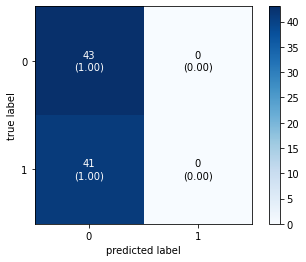

In [18]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [19]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)


Accuracy 0.512
precision 0.000
Recall 0.000
f1_score 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with 10-fold cross validation

In [20]:
#Applying 10-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True,random_state=0)
# evaluate model
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('Accuracy %.3f'%mean(scores))
print('precision %.3f'%np.mean(precision))
print('Recall %.3f'%np.mean(recall))
print('f1_score %.3f'%np.mean(f1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Accuracy 0.524
precision 0.000
Recall 0.000
f1_score 0.000


# Decision Tree with 80:20 spliting

In [21]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)
print(X)

[[0.0003848427190360628, 0.00010036269475598659, -0.000633706945599865, -0.0002030858359140281, 0.00029208528912021706, 0.00014497717653333796, -0.0005241983263687409, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0006083944990169883, 0.000361195987377939, 0.0003266176782465239, -0.00011057053683165978, -9.387746177848849e-05, -1.9892331601941634e-05, -0.00028110416475955464, 0.00038472375175161485, 0.0004804789227741952, -9.387746177848849e-05, -0.00011057053683165978, -0.00010889978011669702, 0.0003268285790726003, 9.622564955102516e-05, 1.7935507273991357e-05, 7.114930948614414e-05, -0.0004141597137017689, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.00031621210711778, 0.001170607591982639, 7.410956871639724e-05, 9.377210262455092e-05, 0.00015266091949319555, -8.748174631712687e-06, 0.00035289202142147, 0.00117060759

In [22]:
# Fitting Decision Tree to the training set
training_accuracy = []
test_accuracy = []
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1e857c33d0>)

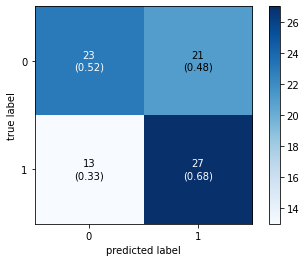

In [23]:
#predicting the Test set results
y_pred=classifier.predict(X_test)


#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [24]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy) 

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)


from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)


Accuracy 0.595
precision 0.562
Recall 0.675
f1_score 0.614


# Decision Tree with 10-fold cross validation

In [ ]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True, random_state=0)
# evaluate model
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('%.3f'%mean(scores))
print('%.3f'%np.mean(precision))
print('%.3f'%np.mean(recall))
print('%.3f'%np.mean(f1))

0.593
0.572
0.582
0.571


# Naive Bayes with 80:20 spliting

In [25]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)
#print(X)

Confusion Matrix for PassiveAggressiveClassifier
Accuracy 0.464
precision 0.469
Recall 0.950
f1_score 0.628


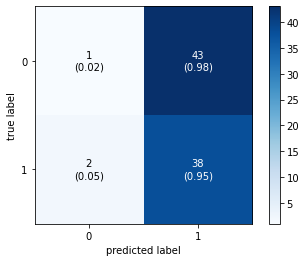

In [26]:
# Fitting SVC to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)
#predicting the Test set results
y_pred=classifier.predict(X_test)
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

# Naive Bayes with 10-fold cross validation

In [27]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True, random_state=0)
# evaluate model
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('%.3f'%mean(scores))
print('%.3f'%np.mean(precision))
print('%.3f'%np.mean(recall))
print('%.3f'%np.mean(f1))

0.481
0.477
0.972
0.637


# Random Forest with 80:20 spliting

In [28]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
#print(X)

Confusion Matrix for PassiveAggressiveClassifier
Accuracy 0.548
precision 0.548
Recall 0.415
f1_score 0.472


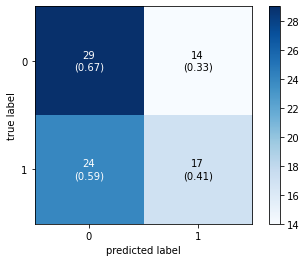

In [29]:
# Fitting Random Forest to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

#predicting the Test set results
y_pred=classifier.predict(X_test)
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

# Random Forest with 10-fold cross validation

In [30]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True, random_state=0)
# evaluate model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('%.3f'%mean(scores))
print('%.3f'%np.mean(precision))
print('%.3f'%np.mean(recall))
print('%.3f'%np.mean(f1))

0.601
0.609
0.462
0.518
